In [14]:
import numpy as np
import pandas as pd
import math
import deeplabcut
from sklearn.cluster import DBSCAN
from collections import Counter
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
from pylab import rcParams

rcParams['figure.figsize'] = 14, 6
%matplotlib inline

In [15]:
path = 'openfield-Pranav-2018-08-20'
original = f'{path}/labeled-data-correct/m1s1/CollectedData_Pranav.csv'
target_csv = f'{path}/labeled-data/m1s1/CollectedData_Pranav.csv'
target_h5 = f'{path}/labeled-data/m1s1/CollectedData_Pranav.h5'

path_config_file = f'{path}/config.yaml'
### read the configure file - config.yaml
cfg = deeplabcut.auxiliaryfunctions.read_config(path_config_file)
### get the scorer name / bodyparts
scorer = cfg['scorer']
bodyparts = cfg['bodyparts']

In [16]:
df = pd.read_hdf(r'openfield-Pranav-2018-08-20\labeled-data\m1s1\CollectedData_Pranav.h5')
snout = df.xs('snout', level='bodyparts', axis=1).to_numpy()
tail = df.xs('tailbase', level='bodyparts', axis=1).to_numpy()
diff = (snout-tail).reshape(len(df), -1, 2)
dist = np.linalg.norm(diff, axis=2)

data = pd.DataFrame(data=dist, index=df.index, columns=None)
def clean_dataset(df):
    assert isinstance(df, pd.DataFrame), "df needs to be a pd.DataFrame"
    df.dropna(inplace=True)
    indices_to_keep = ~df.isin([np.nan, np.inf, -np.inf]).any(1)
    return df[indices_to_keep].astype(np.float64)
data = clean_dataset(data)
#df.plot()

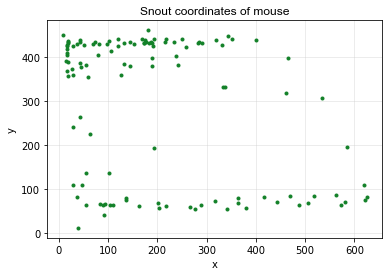

In [17]:
#plotting x and y coordinates of snout and tailbase
#snout
_ = plt.plot(df.loc[:][(scorer,bodyparts[0],'x')],df.loc[:][(scorer,bodyparts[0], 'y')],marker='.',linewidth=0, color='#128128')
_ = plt.grid(which='major',color='#cccccc', alpha = 0.45)
_ = plt.title('Snout coordinates of mouse', family='Arial', fontsize=12)
_ = plt.xlabel('x')
_ = plt.ylabel('y')
_ = plt.show()

#### DBSCAN clustering algorithm

In [18]:
# Prepare data for model
dbscan_data = data
dbscan_data = dbscan_data.values.astype('float32')

# Normalize data
dbscan_data_scaler = StandardScaler().fit(dbscan_data)
dbscan_data = dbscan_data_scaler.transform(dbscan_data)

# Construct model
model = DBSCAN(eps=0.25,min_samples=10,metric='euclidean').fit(dbscan_data)
model

DBSCAN(eps=0.25, min_samples=10)

In [19]:
# Separate outliers from clustered data
outliers_df = data[model.labels_==-1]
clusters_df = data[model.labels_!=-1]

colors = model.labels_
colors_clusters = colors[colors != -1]
color_outliers = 'black'

# Get info abuot the clusters
clusters = Counter(model.labels_)
print(clusters)
print(data[model.labels_ == -1].head())
print('Numebr of clusters = {}'.format(len(clusters)-1))

Counter({0: 101, -1: 14})
                                        0
labeled-data/m1s1/img0040.png  191.769046
labeled-data/m1s1/img0041.png  272.033451
labeled-data/m1s1/img0050.png  287.014493
labeled-data/m1s1/img0061.png   55.937887
labeled-data/m1s1/img0067.png  344.745668
Numebr of clusters = 1


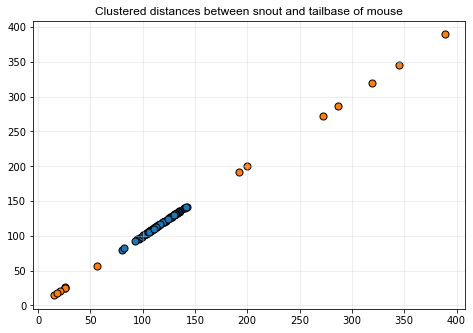

In [20]:
# Plot clusters and outliers
fig = plt.figure()

ax = fig.add_axes([.1,.1,1,1])

ax.scatter(clusters_df,clusters_df, edgecolors='black',s=50)
ax.scatter(outliers_df,outliers_df, edgecolors='black',s=50)

plt.title('Clustered distances between snout and tailbase of mouse', family='Arial',fontsize=12)

plt.grid(which='major',color='#cccccc', alpha=0.45)

plt.show()

In [25]:
# look for frames where bodyparts (like right and left ear) might have been swapped
df = pd.read_hdf(r'openfield-Pranav-2018-08-20\labeled-data\m1s1\CollectedData_Pranav.h5')
snout = df.xs('snout', level='bodyparts', axis=1).to_numpy()
rightear = df.xs('rightear', level='bodyparts', axis=1).to_numpy()
leftear = df.xs('leftear', level='bodyparts', axis=1).to_numpy()

# calculate the angle 
def getAngle(a,b,c):
    angle = math.degrees(math.atan2(c[1]-b[1],c[0]-b[0]) - math.atan2(a[1]-b[1],a[0]-b[0]))
    return angle

angles = []
swapped_frames = []
not_swapped = []
for (a,b,c) in zip(leftear,snout,rightear):
    angles.append(getAngle(a,b,c))
    if getAngle(a,b,c) > 0:
        swapped_frames.append(getAngle(a,b,c))
    else:
        not_swapped.append(getAngle(a,b,c))
        
#print(swapped_frames)
#print(not_swapped)

In [28]:
data = pd.DataFrame(data=angles, index=df.index, columns=None)
def clean_dataset(df):
    assert isinstance(df, pd.DataFrame), "df needs to be a pd.DataFrame"
    df.dropna(inplace=True)
    indices_to_keep = ~df.isin([np.nan, np.inf, -np.inf]).any(1)
    return df[indices_to_keep].astype(np.float64)
data = clean_dataset(data)

In [29]:
# Prepare data for model
dbscan_data = data
dbscan_data = dbscan_data.values.astype('float32')

# Normalize data
dbscan_data_scaler = StandardScaler().fit(dbscan_data)
dbscan_data = dbscan_data_scaler.transform(dbscan_data)

# Construct model
model = DBSCAN(eps=0.25,min_samples=10,metric='euclidean').fit(dbscan_data)
model

DBSCAN(eps=0.25, min_samples=10)

In [30]:
# Separate outliers from clustered data
outliers_df = data[model.labels_==-1]
clusters_df = data[model.labels_!=-1]

colors = model.labels_
colors_clusters = colors[colors != -1]
color_outliers = 'black'

# Get info abuot the clusters
clusters = Counter(model.labels_)
print(clusters)
print(data[model.labels_ == -1].head())
print('Numebr of clusters = {}'.format(len(clusters)-1))

Counter({0: 87, -1: 16, 1: 12})
                                      0
labeled-data/m1s1/img0040.png -8.694378
labeled-data/m1s1/img0041.png -0.460658
labeled-data/m1s1/img0047.png  2.505375
labeled-data/m1s1/img0050.png -9.683654
labeled-data/m1s1/img0061.png -0.834040
Numebr of clusters = 2


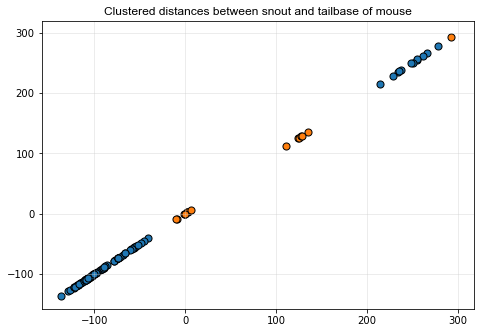

In [31]:
# Plot clusters and outliers
fig = plt.figure()

ax = fig.add_axes([.1,.1,1,1])

ax.scatter(clusters_df,clusters_df, edgecolors='black',s=50)
ax.scatter(outliers_df,outliers_df, edgecolors='black',s=50)

plt.title('Clustered distances between snout and tailbase of mouse', family='Arial',fontsize=12)

plt.grid(which='major',color='#cccccc', alpha=0.45)

plt.show()